# Assignment 5: Decision Trees and Ensemble Methods [ __ / 70  marks]

<img src="https://datasciencetoday.net/images/2018/11/27/tree.png">

For this assignment we will use standalone and ensembled decision trees (Bagging, AdaBoost) in order to predict whether particular red wines are `high quality` or `low quality` based on some associated input features (e.g., fixed acidity, residual sugar, density, alcohol, etc). 

We will first import our data. Next, we will apply the pre-processing steps. Finally, we will construct and compare models. There will also be some communication questions along the way. 

I hope this week's lesson and this assignment will make you more comfortable with using and thinking about decision trees --- they're a very powerful tool.

## Before you start...
* check out the relevant lecture code for reference (`L9_CF.ipynb`)

## Before you submit...
* restart the kernel, then re-run the whole notebook to ensure no errors

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1.1 [ _ /3 marks]

Read the file `winequality-red.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Make sure to remove the semicolons.

`Hint`: Sometimes you will see that dataset entries are separated by `;`,`,`,`&`. You can use the `sep` argument in `read_csv()` to format it properly.

In [11]:
# ****** your code here ******
df = pd.read_csv("winequality-red.csv", sep=";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Question 1.2 [ _ /7 marks]

Before building our models, we will need to **preprocess** the data. Instead of using the 10-class column ('quality') directly, let's just focus on classifying red wines as `'high quality'` or `'low quality'` by manually assigning a threshold. We will consider wines with 'quality' 7 or higher as **'high quality'** (class label `1`) and those with 'quality' 6 or lower as **'low quality'** (class label `0`). Replace the `quality` column with your new column (`CLASS`). 

Display the first 5 rows of the new dataframe. How many instances of class `0` and class `1` are there? [ /1 mark] Is the data class-balanced? [ /1 mark] 

In [12]:
# Replace dependent variable 'quality' with `CLASS` (labels 0 and 1) [ /4 marks]
df = df.rename(columns={"quality": "CLASS"})
df['CLASS'] = np.where(df['CLASS']>6, 1, 0)
df.head()

# How many instances of class 0 and class 1 are there in the data? (code) [ /1 mark]
df.CLASS.value_counts()


0    1382
1     217
Name: CLASS, dtype: int64

**Your Answer**: There are 1382 instances of "low quality" wine where CLASS = 0 and there are 217 instances of "high quality" wine where CLASS = 1. This means that the data is class unbalanced.

## Question 1.3 [ _ /3 marks]

Let's create our train and test sets. Create an input dataframe X (the input features); next, create an output series y which contains the output class labels (a column of `0`'s and `1`'s). Split the data into train and test sets with `train_test_split`. Use `test_size = 0.3`, `random_state = 0`.

In [4]:
# Store the feature data into X; store the class data into y [ /2 marks]
# ****** your code here ******
X = df.drop("CLASS", axis=1)
y = df.CLASS

# Do a train-test split. Use 30% of the data for testing. Use random state 0. [ /1 mark]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=0)


## Question 2.1 [ _ /13 marks]

For our first model we will **select a standalone decision tree of optimal maximum depth** (out of possible maximum depths ranging from `2 to 30`). 

To find the optimal maximum depth, create multiple decision trees with sklearn's `DecisionTreeClassifier` class (you can use a loop), then compute the mean Cross-Validation score for each (use 5-fold CV). You don't need to specify a scorer (Note: for `DecisionTreeClassifier` it's *mean accuracy*).

Create a plot which shows the mean CV scores on the y-axis and maximum depths on the x-axis. **Report the optimal maximum depth**. [ /2 marks]

Text(0, 0.5, 'CV Scores')

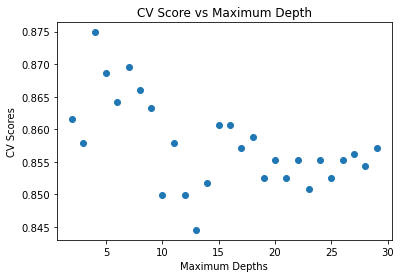

In [5]:
# Create and fit trees from max_depth 2 to max_depth 30. Use 5-fold CV for each. [ /8 marks]
list_scores = []
list_depths = []
for i in range(2,30):
    tree = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(tree, Xtrain, ytrain, cv=5).mean()
    list_depths.append(i)
    list_scores.append(scores)
 
# Plot the mean CV score vs. maximum depth [ /3 marks]
# ****** your code here ******
plt.scatter(list_depths, list_scores)
plt.title("CV Score vs Maximum Depth")
plt.xlabel("Maximum Depths")
plt.ylabel("CV Scores")

# Report the optimal max_depth either here or in the markdown cell below. [ /2 marks]

**Your answer**: The optimal maximum depth is the highest possible cv score in our case depth 4 with a cv score of approximately 0.87490.

## Question 2.2 [ _ /6 marks]

Consider your optimal max_depth tree (or, you can create a new one with that depth). Fit it to the training set. Report its test accuracy on the test set.

Hint: You can use `accuracy_score()` here to report the test accuracy.

In [39]:
# Fit your optimal-depth tree, then calculate test accuracy [ /6 marks]
new_tree = DecisionTreeClassifier(max_depth=4)
new_tree.fit(Xtrain, ytrain)
ypred = new_tree.predict(Xtest)

print(f"Accuracy Score = {accuracy_score(ytest, ypred)}")

Accuracy Score = 0.8958333333333334


## Question 2.3 [ _ /4 marks] 

What is the **major shortcoming** of standalone decision trees? [ /2 marks] What is the **purpose of creating an ensemble of trees**? [ /2 marks]

**Your answer**: The major shortcoming of standalone decision trees is that they have high variance due to overfitting. The purpose of creating an ensemble of trees is that they provide a solution on how to reduce the high variance of standalone decision trees. Normally, several decision trees are combined to produce better predictive performance than just 1 decision tree, the main principle is that a group of weak trees/predictions can be combined to produce a strong prediction. 

## Question 3.1 [ _ /24 marks]

Let's now focus on creating an **ensemble of 500 trees**. For this question we'll consider Bagging (Bootstrap Aggregation). Follow these steps:
* **Step 1**: Create 500 Bootstrap samples (i.e. sample with replacement) from the dataset (specifically, sample from the training data).
* **Step 2**: Train a particular tree (`max_depth=4`) on each Bootstrap sample (you'll therefore need 500 trees in total)
* **Step 3**: Compute the **overall prediction** of your ensemble on the unseen test set. The overall prediction from each individual test input will come from a vote count from each of the 500 trees. **Report the test accuracy**.

To expand on the `voting` point from Step 3: For each test input, each tree will make a certain output prediction. So, for a single test input you'll have 500 votes, and these could be 1 or 0. For the overall prediction for that single test input, you'll count which class (0 or 1) got the most votes.

Note: Since this question is meant to be a manually done, you won't get the marks if you use sklearn's `BaggingClassifier` or similar.

In [74]:
# Create 500 Bootstrap samples from the training set. Fit a tree to each [ /12 marks]
df2 = Xtrain.join(ytrain) #join Xtrain with ytrain data to new dataframe

def bootstrap(S):
    nsim = 500
    tree_list = []
    
    for i in range(nsim):
        bootstrap_samples = S.sample(nsim, replace=True)
        model = DecisionTreeClassifier(max_depth=4)
        model.fit(bootstrap_samples.drop(columns="CLASS"),bootstrap_samples["CLASS"])
        tree_list.append(model)
    return tree_list

# Make 500 predictions on the test data (unseen by your trees so far). [ /6 marks] 
ypr = []
samples = bootstrap(df2)
for j in range(0, len(samples)):
    ypr.append(samples[j].predict(Xtest))

# Finally, compute the overall vote for each prediction (the most votes for a given class wins) [ /4 marks]
# Hint: If there's a tie, the common way is to predict the class with the lowest class label
# However, it's also ok to use scipy.stats.mode here (this randomly picks tie winners)
votes = []
    
for l in range(0, len(ypr[0])):
    ones_pred = 0
    zero_pred = 0
    for m in range(0, len(ypr)):
        if ypr[m][l]:
            ones_pred += 1
        else:
            zero_pred += 1
    
    if ones_pred > zero_pred:
        votes.append(1)
    else:
        votes.append(0)

# Report (print) the accuracy of your ensemble model on the test set. Use accuracy_score() [ /2 marks]
print(f"Accuracy Score = {accuracy_score(ytest, votes)}")

Accuracy Score = 0.9083333333333333


## Question 3.2 [ _ /6 marks]

Finally, let's consider AdaBoost. Here, each tree (a stump) is trained sequentially and relies on the previous tree for its training data (which was re-sampled, and this was influenced by the sample weight changes as a result of incorrect predictions from the previous tree). 

Create an `AdaBoostClassifier` object with `base_estimator = DecisionTreeClassifier(max_depth=4)`, `n_estimators=500`, `learning_rate=0.1`. Fit to the training data, and compute (and report) the test accuracy. You can use `accuracy_score()` here.


In [72]:
# Create an AdaBoostClassifier object with the specified arguments [ /2 marks]
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=4), n_estimators=500, learning_rate=0.1)

# Fit to the training data and compute the test predictions [ /2 marks]
ada.fit(Xtrain, ytrain)
ypred3 = ada.predict(Xtest)

# Compute and report the test accuracy [ /2 marks]
print(f"Accuracy Score = {accuracy_score(ytest, ypred3)}")

Accuracy Score = 0.9166666666666666


## Question 3.3 [ _ /4 marks]

Finally, compare the test accuracies of the models considered so far: the optimal max_depth Decision Tree, the bagged ensemble of 500 trees, and the AdaBoost ensemble of 500 trees. Which performed worst? Which performed best? Do the results agree with our intuition from the Lecture?

Hint: One intuition you could use from the lecture was that ensemble methods have **lower variance** than a single tree (i.e. less prone to overfitting).

**Your answer**:The standalone Decision Tree Classifier had the lowest accuracy score of around 0.89 therefore it performed the worst while both of the ensemble methods had higher accuracy scores of approximately 0.90 and 0.91.The ada classifier performed the best with approximately 0.9166 accuracy. This fits with our intuition because we know that standalone decision trees have high variance or are prone to overfitting. This means that the model is overfitting to the training data and thus is fair to assume the model will perform worse when given the test dataset compared to a model that is more flexible to the variation or noise in the data. When overfitting we typically fit to the noise or variations within the data which is not uniform data, therefore the model will generally perform worse. This is evident in our calculations of accuracy score, a standalone Decision Tree Classifier had the lowest accuracy score which correlates with overfitting and high variance. Adaboost as well as bootstrap had a higher accuracy score which shows us that these models are less prone to overfitting demostrating their lower variance compared to standalone decision trees since they are more flexible to noise/variations within the dataset.